In [1]:
%matplotlib inline
from __future__ import division
import numpy as np

import os
import sys
import datetime
from subprocess import call
import subprocess
import glob
import djPyi2 as DJ
import pandas as pd
pd.options.mode.chained_assignment = None
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy 
import pybedtools as pbt
import ciepy
import cardipspy as cpy
import networkx as nx
from djPyi2 import mpltools
from mpl_toolkits.axes_grid1 import  make_axes_locatable
import matplotlib.patches as patches
from djPyi2 import Common as CM
import matplotlib.image as mpimg
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
import numpy as np
import matplotlib.cm as cm

In [2]:
import vapeplot

In [3]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

In [4]:
dy_name = 'Figures'

private_out = os.path.join(DJ.root, 'private_output', dy_name)
if not os.path.exists(private_out):
    cpy.makedir(private_out)

In [5]:
def add_svtype_cats(all_qtls_filt):
    convert = {'STR':'STR', 'INDEL': 'INDEL', 'SNP': 'SNV', 'SNV': 'SNV', 'INDEL_DEL': 'INDEL', 
               'INDEL_INS': 'INDEL'}
    all_qtls_filt['SVTYPE_SUPER'] = all_qtls_filt.SVTYPE_NR.apply(lambda x: convert.get(x, 'SV'))
    convert = {'STR':'STR', 'INDEL': 'INDEL', 'SNP': 'SNV',
               'ALU': 'MEI', 'LINE1': 'MEI', 'SVA':'MEI', 'rMEI':'MEI', 
          'DUP': 'CNV', 'DEL': 'CNV', 'mCNV': 'CNV', 'SNV': 'SNV', 'INDEL_INS': 'INDEL', 'INDEL_DEL': 'INDEL'}
    all_qtls_filt['SVTYPE_COLLAPSE'] = all_qtls_filt.SVTYPE_NR.apply(lambda x: convert.get(x, 'other SV'))
    convert = {'LINE1':'MEI', 'SVA': 'MEI', 'ALU': 'MEI'}
    all_qtls_filt['SVTYPE_NR_C'] = all_qtls_filt.SVTYPE_NR.apply(lambda x: convert.get(x,x))
    return all_qtls_filt

In [6]:
enr_gene_types_bet_svt_lead_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/enr_gene_types_bet_svt_lead_mod.pkl')

In [7]:

sb_coding_egene_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_coding_egene_mod.pkl')

sb_nc_egene_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_nc_egene_mod.pkl')

vc_coding_egene_types_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/vc_coding_egene_types_mod.pkl')


num_eg_bar=vc_coding_egene_types_mod.groupby(("SVTYPE", 'coding'))['count'].sum().to_frame('num_egene').reset_index()
t = num_eg_bar.groupby('SVTYPE').num_egene.sum()
num_eg_bar = num_eg_bar[num_eg_bar.coding].set_index('SVTYPE')
num_eg_bar = num_eg_bar.join(t.to_frame('total'), how = 'outer').fillna(0)
sb_coding_egene_mod['category'] = 'coding'
sb_nc_egene_mod['category'] = 'non-coding'
sb_all = pd.concat([sb_coding_egene_mod, sb_nc_egene_mod])

In [952]:
sb_all_egene_types = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_all_egene_types.pkl')

In [1009]:

sb_ol_egene_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_ol_egene_mod.pkl')

sb_nonol_egene_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_nonol_egene_mod.pkl')

sb_all_egene_types_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_all_egene_types_mod.pkl')

vc_ol_egene_types_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/vc_ol_egene_types_mod.pkl')


num_eg_bar=vc_ol_egene_types_mod.groupby(("SVTYPE", 'coding'))['count'].sum().to_frame('num_egene').reset_index()
t = num_eg_bar.groupby('SVTYPE').num_egene.sum()
num_eg_bar = num_eg_bar[num_eg_bar.coding].set_index('SVTYPE')
num_eg_bar = num_eg_bar.join(t.to_frame('total'), how = 'outer').fillna(0)


sb_ol_egene_mod['category'] = 'overlapping'
sb_nonol_egene_mod['category'] = 'non-overlapping'
sb_all = pd.concat([sb_ol_egene_mod, sb_nonol_egene_mod])

In [954]:
sb_all_egene_types_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_all_egene_types_mod.pkl')

In [195]:
exac_annot = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/exac_annot.pkl')

In [196]:
exac_tested = exac_annot[exac_annot.tested_eqtl]

In [636]:
var_egene = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/eqtl_processing/qtl_results_01_17_v4/var_egene_annot_maf5_sv_only.pkl')
var_egene['beta_abs'] = var_egene.beta.abs()

var_egene_nr = var_egene[var_egene.most_significant_nr == True]

In [ ]:
var_egene_nr.pipe(add_svtypes)

In [638]:
top = var_egene_nr[var_egene_nr.top_hit_final_sig]

In [95]:
def plot_clustered_stacked_bar(dfall, color_pal, order_clusters, groupby_col, labels=None, orient = 'horizontal',
                               H="/", ax = None, legend = False, fontsize_legend=6,
                               order_rows = None, order_cols = None,**kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    
    n_col = len(order_cols) 
    n_ind = len(order_rows)
    if ax is None:
        ax = plt.subplot(111)
        
    n_df = len(order_clusters)
    colors = [color_pal[i] for i in order_cols]
    
#     ax.xaxis.grid(zorder = 1)
    
    convert = {'horizontal':'barh', 'vertical':'bar'}
    for clust in order_clusters:
        df = dfall.groupby(groupby_col).get_group(clust)
        df = df[[i for i in df.columns if i != groupby_col]]
        if order_rows is not None:
            df = df.loc[order_rows]
        if order_cols is not None:
            df = df[order_cols]
            
        colors = [color_pal[i] for i in df.columns]

        ax = df.plot(kind=convert[orient],
                      stacked=True,
                      ax=ax,
                      legend=False,
                      colors = colors,zorder = 20,
                          **kwargs)  # make bar plots


    if orient == 'horizontal':

        h,l = ax.get_legend_handles_labels() # get the handles we want to modify
        y_locs = []
        for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
            for j, pa in enumerate(h[i:i+n_col]):
                for rect in pa.patches: # for each index
                    y_loc = rect.get_y() + 1 / float(n_df + 1) * i / float(n_col)
                    y_locs.append(y_loc)
                    rect.set_y(rect.get_y() + 1 / float(n_df + 1) * i / float(n_col))
                    rect.set_hatch(H * int(i / n_col)) #edited part     
                    rect.set_height(1 / float(n_df + 2))
#                     rect.set_linewidth(0.2)
#                     rect.set_edgecolor('black')
        height_n = 1 / float(n_df + 2)
        mids = np.unique(sorted(y_locs)) + (height_n/n_df)
        yticks = []
        m = np.floor(len(mids)/n_df)
        n = 0
        for i in range(int(n_ind)):
            yl = np.mean(mids[n:n+n_df])
            yticks.append(yl)
            n = n+n_df
        mids = mids[1::n_df]
        ax.set_yticks(yticks)
        ax.set_yticklabels(df.index, rotation = 0)
        ax.invert_yaxis()
    if orient == 'vertical':
        h,l = ax.get_legend_handles_labels() # get the handles we want to modify
        for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
            for j, pa in enumerate(h[i:i+n_col]):
                for rect in pa.patches: # for each index
                    rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                    rect.set_hatch(H * int(i / n_col)) #edited part     
                    rect.set_width(1 / float(n_df))

        ax.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
        ax.set_xticklabels(df.index, rotation = 0)

    if legend:
        # Add invisible data to add another legend
        n=[]        
        for i in range(n_df):
            n.append(ax.bar(0, 0, color="white", linewidth= 0.4,edgecolor = 'black', hatch=H * i))

        l1 = ax.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
        if labels is not None:
            l2 = ax.legend(n, labels, bbox_to_anchor = [1,0], loc = 'lower right', fontsize = fontsize_legend) 
        ax.add_artist(l1)
        return ax, l1, l2, n, labels, rect
    return ax

In [258]:
def plot_enr(fig, ax, enr_df, order_hue, order_of_rows, pal, x_col = 'log2_odds_ratio', 
            y_col = 'category', hue_col = 'SVTYPE_NR', s = 5, lw = 1):
#     fig, ax = plt.subplots(1,1, figsize=(4,10), constrained_layout = False)
    tdf = enr_df
    tdf['significant'] = tdf.fdr_corrected_p < 0.05
    order_t = order_of_rows
    # tdf = chmm15_pv_nr[(chmm15_pv_nr.log2_odds_ratio_raw < 10) & (chmm15_pv_nr.log2_odds_ratio_raw > -10)]
    tdf = tdf[(tdf.SVTYPE_NR_C).isin(order_hue)]
    tdf1 = tdf[tdf.significant == False]
    tdf2 = tdf[tdf.significant]


    sns.stripplot(x = x_col, y = y_col, hue = hue_col, 
                  data = tdf1, dodge = True, palette=pal, edgecolor = 'black', 
                  order = order_of_rows, jitter = True, ax =ax, s= s, lw = lw)

    sns.stripplot(x = x_col, y = y_col, hue = hue_col,
                  data = tdf2 , palette=pal, lw = 1, s= s,  color = 'black', 
                  marker = 'x',dodge=True, jitter = True, order =order_of_rows, ax = ax)

    ylim = ax.get_ylim()
    max_y = max(ylim)
    min_y = min(ylim)
    t = np.arange(min_y, max_y, 1)[1:]
    for l in t:
        ax.axhline(l, color = 'grey')

    ax.axvline(0, linestyle = '--', color = 'grey')
    leg = ax.legend(bbox_to_anchor = (1,1), loc = 'upper left')
    return ax, leg

# Palletes

In [13]:
gene_types_mod = ['protein_coding', 'pseudogene', 'lincRNA', 
                  'antisense', 'miRNA', 'misc_RNA', 'snoRNA', 'sense_intronic', 'processed_transcript', 'other']

In [157]:
gene_types_mod2 = ['protein_coding', 'pseudogene', 'lincRNA', 
                  'antisense', 'miRNA', 'other']

In [173]:
order_vars_c = ['DEL', 'DUP', 'mCNV', 'MEI', 'INV', 'BND', 'STR']

In [165]:
sb_ol_egene_mod['category'] = 'overlapping'
sb_nonol_egene_mod['category'] = 'non-overlapping'

sb_all = pd.concat([sb_ol_egene_mod, sb_nonol_egene_mod])

In [28]:
order_variants_sb = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND']

In [88]:
order_vars_c = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'MEI', 'BND']

In [640]:
colors = vapeplot.palette('vaporwave')
gene_types = ['protein_coding', 'pseudogene', 'lincRNA', 'antisense', 
              'miRNA', 'misc_RNA', 'snoRNA', 'sense_intronic', 'processed_transcript', 
              'sense_overlapping', 'polymorphic_pseudogene', '3prime_overlapping_ncrna', 'TR_C_gene']

colors_dict_gene_types = dict(zip(gene_types, [colors[i] for i in range(len(gene_types))]))

gene_types = ['protein_coding', 'pseudogene', 'lincRNA', 'antisense', 'miRNA', 'misc_RNA', 'snoRNA', 'sense_intronic', 'processed_transcript', 'sense_overlapping', 'polymorphic_pseudogene', '3prime_overlapping_ncrna', 'TR_C_gene']
mapping = dict(zip(gene_types, gene_types[:-4] + ['other', 'other', 'other', 'other']))

gene_types_mod = ['protein_coding', 'pseudogene', 'lincRNA', 'antisense', 'miRNA', 'misc_RNA', 'snoRNA', 'sense_intronic', 'processed_transcript', 'other']

color_dict_gene_types_mod  = dict(zip(gene_types_mod, sns.color_palette('pastel')))

gene_types_mod2 = ['protein_coding', 'pseudogene', 'lincRNA', 'antisense',
                   'other']
color_dict_gene_types_mod2  = dict(zip(gene_types_mod2, sns.color_palette('pastel')))

In [ ]:
mapping = dict(zip(gene_types, gene_types[:-] + ['other', 'other', 'other', 'other']))


In [736]:
genes_filt_398_80_50 = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/eqtl_processing/genes_filt_398_80_50.pkl')

In [672]:
mapping_mod =dict(zip(gene_types, gene_types[:4] + ['other'] * len(gene_types[4:])))

In [673]:
top['gene_type_mod'] = top.gene_type.apply(lambda x: mapping_mod.get(x))
top['beta_abs'] = top['beta'].abs()
top['protein_coding'] = (top.gene_type == 'protein_coding')
inds = top[(top.SVTYPE_NR == 'DEL') & (top.CALLER == 'GS')].index.tolist()
top.loc[inds, 'beta_corrected'] = top.loc[inds, 'beta']  * -1

In [844]:
inds = top[(top.SVTYPE_NR == 'DEL') & (top.CALLER != 'GS')].index.tolist()
top.loc[inds, 'beta_corrected'] = top.loc[inds, 'beta']  * 1

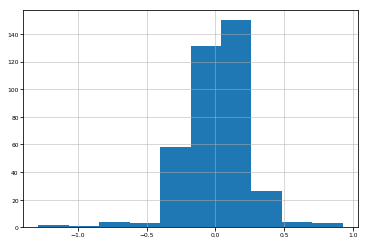

In [843]:
top[(top.SVTYPE_NR == 'DEL') & (top.CALLER == 'SS')].beta.hist()

In [739]:
top = top.merge(genes_filt_398_80_50[['TPM_NoneZero']], left_on='feature_id', right_index=True, how = 'left')

In [785]:
exac_tested = exac_tested.merge(genes_filt_398_80_50[['TPM_NoneZero']], left_on='gene_id', 
                                right_index=True, how = 'left')

In [763]:
top['TPM_change'] = (top.beta_corrected * top.TPM_NoneZero)

In [778]:
top['log10_TPM_NoneZero'] = np.log10(top.TPM_NoneZero)

In [895]:
top.TPM_NoneZero.describe()

count    6966.000000
mean       24.283819
std        45.957406
min         0.500205
25%         2.877101
50%        10.864324
75%        27.443763
max      1061.481191
Name: TPM_NoneZero, dtype: float64

In [ ]:
[1, 10, 100, 1000]

In [788]:
exac_tested['log10_TPM_NoneZero'] = np.log10(exac_tested.TPM_NoneZero)

In [814]:
top['beta_tpm_ratio'] = top.beta_abs/(np.log10(top.TPM_NoneZero + 10))

top['log10beta_tpm_ratio'] = np.log10(top.beta_tpm_ratio + 1) 

top['log10_TPM_change'] = np.log10(top.TPM_change.abs() + 10) 

In [822]:
top.TPM_change.describe()

count    6966.000000
mean        0.147203
std        11.842016
min      -153.887220
25%        -1.949590
50%        -0.081592
75%         1.779288
max       591.240414
Name: TPM_change, dtype: float64

In [734]:
genes_filt_398_80_50 = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/eqtl_processing/genes_filt_398_80_50.pkl')

# Figure

In [1012]:
mpl.gridspec.rcParams['legend.handletextpad'] = 0.2
mpl.gridspec.rcParams['legend.columnspacing'] = 0.5
mpl.gridspec.rcParams['legend.labelspacing'] = 0.5
mpl.gridspec.rcParams['axes.labelpad'] = 1
mpl.gridspec.rcParams['axes.labelpad'] = 1
mpl.gridspec.rcParams['ytick.major.pad'] = 1
mpl.gridspec.rcParams['xtick.major.pad'] = 1
mpl.gridspec.rcParams['axes.titlesize'] = 10
mpl.gridspec.rcParams['axes.labelsize'] = 7
mpl.gridspec.rcParams['ytick.labelsize'] = 6
mpl.gridspec.rcParams['xtick.labelsize'] = 6
mpl.gridspec.rcParams['axes.labelweight'] = 'bold'
mpl.gridspec.rcParams['grid.linewidth'] = 0.5
mpl.gridspec.rcParams['font.size'] = 7
mpl.gridspec.rcParams['legend.facecolor'] = 'white'
mpl.rcParams['hatch.linewidth'] = 0.2

In [1013]:
pal_scores = {'pLI': 'red', 'pRec': 'orange', 'pNull': 'blue'}

In [418]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

In [870]:
d = {'coding': 'exonic', 'non-coding': 'non-exonic'}
sb_all['category'] = sb_all['category'].apply(lambda x: d[x])

In [1018]:
def get_order(sb_all, order_gene_type):
    c = sb_all.columns.tolist()
    order = [i for i in order_gene_type if i in c]
    print order
    return sb_all[order]
def plot_sb(ax, sb_all, colors_dict_gene_types, order_gene_type):
    tdf = get_order(sb_all, order_gene_type)
    colors = [colors_dict_gene_types[i] for i in tdf.columns]
    tdf.plot(kind = 'barh', stacked = True, colors = colors, ax = ax, zorder =20)
    plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
    return ax

In [971]:
sb_all_egene_types_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_all_egene_types_mod.pkl')

In [1002]:
sb_all_egene_types_sig_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/sb_all_egene_types_sig_mod.pkl')

In [973]:
vc_all_egene_types_mod = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/egene_properties_analysis/qtl_data_01_19/vc_all_egene_types_mod.pkl')

In [976]:
num_egene_all = vc_all_egene_types_mod.groupby('SVTYPE')['count'].sum()

['protein_coding', 'pseudogene', 'lincRNA', 'antisense', 'other']


/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Optimization terminated successfully.
         Current function value: 0.570400
         Iterations 6


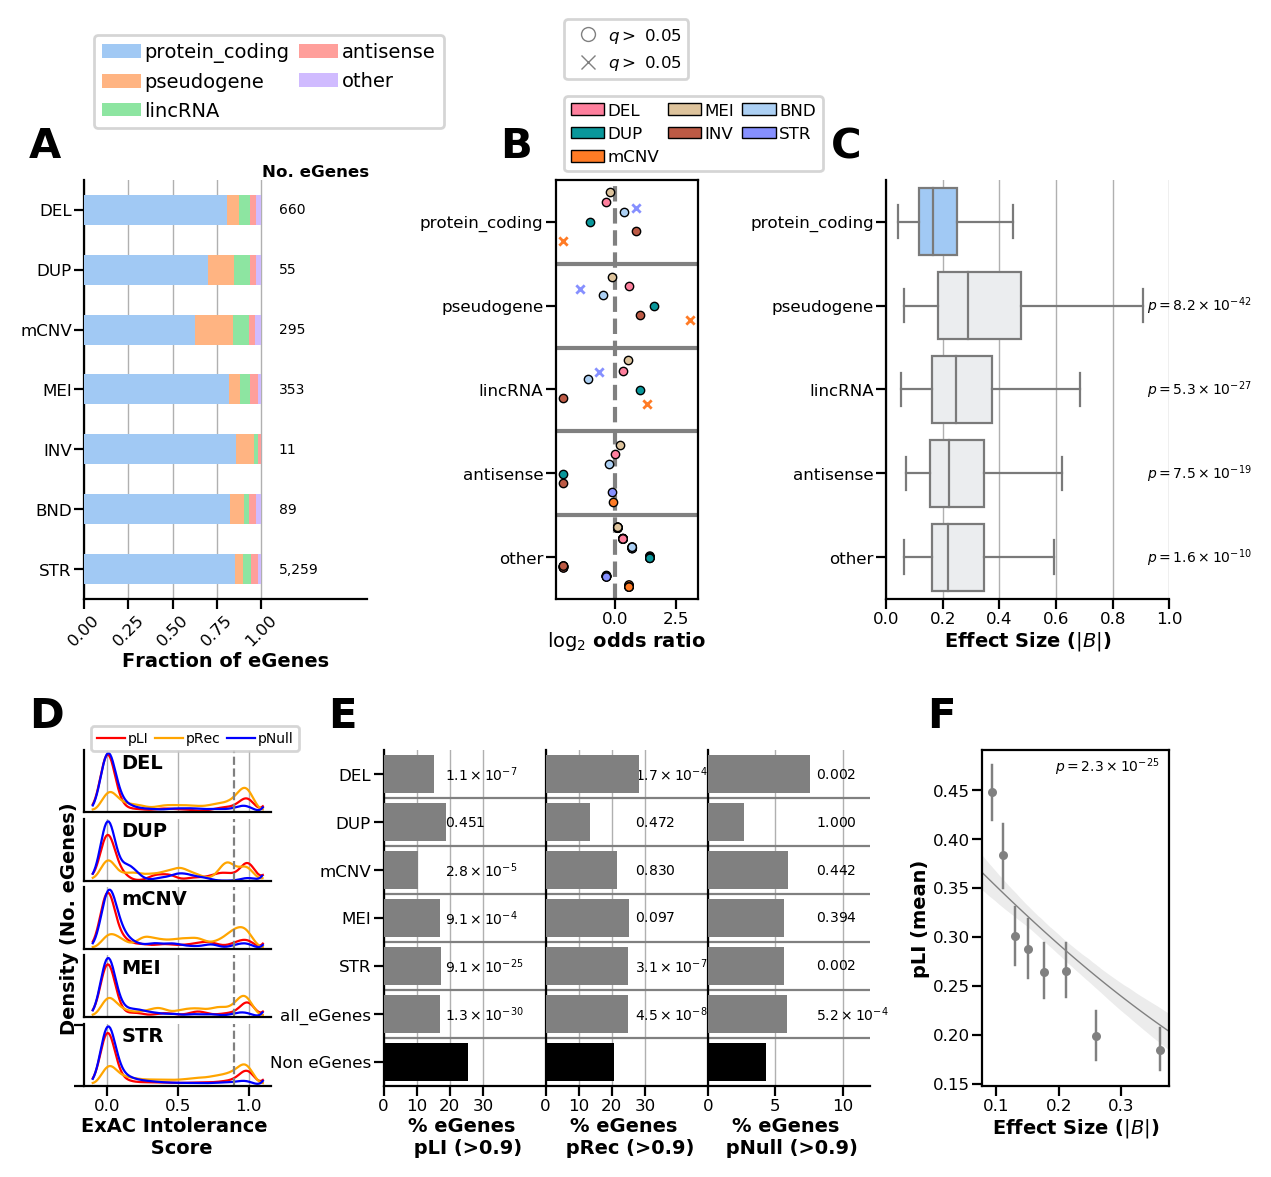

In [1066]:
fig =plt.figure(figsize=(7,6), dpi = 200)
gs = mpl.gridspec.GridSpec(2, 2, 
                           figure =fig,
                           width_ratios=[1.5, 1.2], height_ratios = [1,0.8], wspace = 0.4, hspace=0.4)


# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1])
# ax3 = fig.add_subplot(gs[2])

subgrid_upper = mpl.gridspec.GridSpecFromSubplotSpec(1,3, subplot_spec= gs[0,:], wspace=0.8,
                                               hspace= 0.5, width_ratios = [1,0.5,1])
subgrid_upper2 = mpl.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec= subgrid_upper[0], wspace=0.2,
                                               hspace= 0.1, width_ratios = [1,1])

subgrid_lower = mpl.gridspec.GridSpecFromSubplotSpec(1,4, subplot_spec= gs[1,:], wspace=0.6,
                                               hspace= 0.5, width_ratios = [1,1,1, 1])
subgrid_bb = mpl.gridspec.GridSpecFromSubplotSpec(5,1, subplot_spec= subgrid_lower[:,0], wspace=0.3,
                                               hspace= 0.1, width_ratios = [1])
subgrid_h = mpl.gridspec.GridSpecFromSubplotSpec(1,3, subplot_spec= subgrid_lower[:,1:-1], wspace=0,
                                               hspace= 0, width_ratios = [1,1,1], height_ratios = [1,])

cat = ['exonic', 'non-exonic']

ax1 = fig.add_subplot(subgrid_upper[0])

ax2 = fig.add_subplot(subgrid_upper[1])
ax3 = fig.add_subplot(subgrid_upper[2])
# ax3_b = fig.add_subplot(subgrid_upper2[1])

ax1.xaxis.grid(zorder = 1)




ax1 = plot_sb(ax1, sb_all_egene_types_sig_mod.loc[order_vars_c], 
                                       color_dict_gene_types_mod2, gene_types_mod2)
ax1.invert_yaxis()
ax1.xaxis.grid(zorder = 1)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.set_xlim(0, 1.6)
ax1.legend(bbox_to_anchor = (0,1.1), ncol = 2, title = '', loc = 'lower left')

xmax = 1.6
for a in [ax1]:
    a.ticklabel_format(axis = 'x', style='plain')
    a.set_xlim(0,xmax)
    a.set(ylabel='')
    a.set_xticks([0.0, 0.25, 0.50, 0.75, 1.0])
    a.set_xlabel('Fraction of eGenes')

    yticks = a.get_yticks()
    for i, svt in enumerate(order_vars_c):
        lab = '{:0,d}'.format(num_egene_all.loc[svt])
        yloc = yticks[i]
        x = 1.02
        a.annotate(lab ,(x, yloc),
                     ha='left', va='center', fontsize=5, color='black', rotation=0, 
                        xytext=(5, 0),
                     textcoords='offset points', zorder = 20)
    x_title = (xmax + x) / 2
    a.text(x_title, min(a.get_ylim()), 'No. eGenes', ha='center', va='bottom', fontsize=6, 
                weight = 'bold')


ax2, leg = plot_enr(fig, ax2, enr_gene_types_bet_svt_lead_mod, order_vars_c, gene_types_mod2,
                    color_pal_svtypes_all, 
         y_col='category_out', x_col='log2_odds_ratio', hue_col = 'SVTYPE_NR_C', s = 3, lw = 0.5)
ax2.set_ylabel('')



markers = ['o', 'x']
ec  = ['grey', 'grey']
labels = ['$q >$ 0.05', '$q >$ 0.05']

patches = mpltools.get_legend_patches(labels, marker=markers, markeredgecolor='grey',
                                      markeredgewidth=0.5, markersize = 5)


leg = ax2.legend(handles = patches, bbox_to_anchor = [0,1.22], loc = 'lower left', ncol =1, fontsize = 6)

ax2.add_artist(leg)
labels =  order_vars_c
markerc = [color_pal_svtypes_all[i] for i in labels]
patches = mpltools.get_legend_patches(labels, just_rect=True, rectfacecolor=markerc, rectedgecolor='black',
                                      rectlinewidth=0.5)

leg2 = ax2.legend(handles = patches, bbox_to_anchor = [0,1], 
                  loc = 'lower left', ncol =3, fontsize = 6)


ax2.set_xlabel('$\log_{2}$ odds ratio')

ax3 = sns.boxplot(x ='beta_abs', y = 'gene_type_mod', data = top, ax = ax3,
                  palette=color_dict_gene_types_bp,
                  fliersize=0, 
                  order = gene_types_mod2, linewidth=0.8, boxprops ={'zorder': 22}, zorder = 23, saturation = 1)
ax3.set_ylabel('')
ax3.legend().set_visible(False)
ax3.set_xlabel('Effect Size ($|B|$)')
ax3.set_xlim(0,1)
ax3.xaxis.grid(b = True, zorder = 1, linewidth = 0.5)


x = 0.92
for svt, y in zip(gene_types_mod2[1:], ax3.get_yticks()[1:]):   
    text = stats_es_gt.loc[svt, 'p_bonf']
#         print text, svt, score
    if text < 0.001:
            s = "%1.2e" % text
            ax3.text(x, y,  r"$p={0:s}$".format(as_si(text, 1)), ha = 'left', va = 'center', fontsize = 5)
    else: 
        if text != 0.00:
            s = "%1.4f" % text
            ax3.text(x, y, r'$p=%1.3f$' % text, ha = 'left', va = 'center', fontsize = 5)
        else:
            s = "%1.2e" % 1e-40
            ax3.text(x, y,  r"$p<{0:s}$".format(as_si( 1e-40, 1)), ha = 'left', va = 'center', fontsize = 5)

sns.despine(ax= ax3)
sns.despine(ax= ax1)


axes = []
count = 0    
for i, svt in enumerate(['DEL', 'DUP', 'mCNV', 'MEI', 'STR']):
    if i == 0:
        a = fig.add_subplot(subgrid_bb[i: i+1, 0], facecolor = (0,0,0,0))
    
    else:
        a = fig.add_subplot(subgrid_bb[i: i+1, 0], facecolor = (0,0,0,0), sharex = a)
    
    axes.append(a)
    for i, score in enumerate(['pLI', 'pRec', 'pNull']):
        

        tdf = exac_tested[(exac_tested.SVTYPE_NR_C == svt)]
        c =  sns.kdeplot(tdf[score],ax = a, color = pal_scores[score], label = score,
                         legend = False, shade = False, lw = 0.8, cut = 2, bw = 0.05)
#     a.set_ylabel(svt)
#     a.tick_params(axis = 'x', length = 0)
    a.text(0.2, 0.8, svt, color= 'black', clip_on = False, transform = a.transAxes,
           horizontalalignment='left',  verticalalignment='center', weight = 'bold')
    a.set_yticklabels([])
    sns.despine(ax =a, left = False)
    if svt != 'STR':
        a.tick_params(axis = 'both', length = 0)
        plt.setp(a.get_xticklabels(), visible=False)
        
    a.xaxis.grid(linewidth = 0.5)
    a.axvline(x = 0.9, linestyle = '--', color = 'grey', lw = 0.8)
#     a.set_xticks(xticks)

ax3_mid = axes[2]
ax3_mid.set_ylabel('Density (No. eGenes)')
axes[0].legend(bbox_to_anchor = (0, 1.5), loc = 'upper left', fontsize = 5, ncol = 3)
axes[-1].set_xlabel('ExAC Intolerance \n Score')
ax3_lab = axes[0]


color_pal_lead_sig = {False: 'grey', True: '#7DCEA0'}
color_pal_gs = {'eGenes (Lead)': '#7DCEA0', 'eGenes (Not-Lead)':'grey', 
                   'eGenes':'#626567', 'Non eGenes': '#EBEDEF'}

color_pal_all_eSV = {False: '#FFF9C4', True: '#145A32'}

color_pal_gs2 = {i:'grey' for i in ['DEL', 'DUP', 'mCNV', 'MEI', 'STR', 'all_eGenes']}
color_pal_gs2['Non eGenes'] = 'black'
# cat_order = ['DEL', 'DUP', 'mCNV', 'MEI', 'STR', 'all_eSV']
# for i, score in enumerate(['pLI', 'pRec', 'pNull']):
#     a = fig.add_subplot(subgrid_[0,i+1: i+2], facecolor = (0,0,0,0))
    
    
#     sns.barplot(y ='category', x = 'frac_high', hue = 'gene_set', order = cat_order,
#                 data =exac_vc_svt_high_score[(exac_vc_svt_high_score.high_variable) & 
#                                        (exac_vc_svt_high_score.variable == score)], 
#                palette = color_pal_gs)
#     a.set_xlabel('% eGenes \n (>0.9) {}'.format(score))

cat_order = ['DEL', 'DUP', 'mCNV', 'MEI', 'STR', 'all_eGenes', 'Non eGenes']
xticks = [0, 0.1, 0.2, 0.3]
xticks2 = [0, 0.05, 0.1, 0.15]
axes = []
for i, score in enumerate(['pLI', 'pRec', 'pNull']):
    a = fig.add_subplot(subgrid_h[i: i+1], facecolor = (0,0,0,0))
    a.xaxis.grid(zorder = 1)
    tdf = exac_vc_svt_high_score[(exac_vc_svt_high_score.variable == score)]
    sns.barplot(y ='category', x = 'frac_high', order = cat_order,
                data =tdf, 
               palette = color_pal_gs2, ax = a, zorder = 20)

    a.set_xlabel('% eGenes \n {} (>0.9)'.format(score))
    for ax in [a]:
        ax.set_xlim(0,0.49)
        ax.set_xticks(xticks)
        ax.set_ylabel('')
        if i != 0:
            ax.set_ylabel('')
            ax.set_yticklabels('')
            ax.tick_params(axis = 'y', length = 0)
        
        
        if i == 2:
            ax.set_xticks(xticks2)
            ax.set_xlim(0,0.12)
    sns.despine(ax =a, left = False)
    a.xaxis.set_major_formatter(mtick.PercentFormatter(1, symbol = None, decimals=0))
    axes.append(a)

scores = ['pLI', 'pRec', 'pNull']
start_point = [0.185, 0.27, 0.08]
for i in range(3):
    a = axes[i]
    score = scores[i]
    x = start_point[i]
    tdf = enr_exac_svt_vs_non[enr_exac_svt_vs_non.category == score]
    tdf = tdf.set_index('svt', drop = False)
    for svt, y in zip(cat_order[:-1], a.get_yticks()):   
        text = tdf.loc[svt, 'fdr_corrected_p']
#         print text, svt, score
        if text < 0.001:
                s = "%1.2e" % text
                a.text(x, y,  r"${0:s}$".format(as_si(text, 1)), ha = 'left', va = 'center', fontsize = 5)
        else: 
            if text != 0.00:
                s = "%1.4f" % text
                a.text(x, y, r'$%1.3f$' % text, ha = 'left', va = 'center', fontsize = 5)
            else:
                s = "%1.2e" % 1e-40
                a.text(x, y,  r"$<{0:s}$".format(as_si( 1e-40, 1)), ha = 'left', va = 'center', fontsize = 5)
            

    ylim = a.get_ylim()
    max_y = max(ylim)
    min_y = min(ylim)
    t = np.arange(min_y, max_y, 1)[1:]
    for l in t:
        a.axhline(l, color = 'grey', lw = 0.8)      

    a.legend().set_visible(False)
    
ax4_lab = axes[0]

ax5 = fig.add_subplot(subgrid_lower[0, -1])
for_plot = exac_tested[(exac_tested.sig_eqtl)]
with mpl.rc_context({"lines.linewidth": 0.5}):
    sns.regplot(for_plot.beta_corrected.abs(), for_plot.pLI, x_bins= 8, logistic = True, scatter_kws={'s': 5}, 
            line_kws={'lw': 0.5}, color = 'grey', ax = ax5)
# y_pred = m.predict(exog = {'beta_abs': x1n})
# ax5.plot(x1n, y_pred, c = 'green', lw = 0.1)

for_plot['beta_abs'] = for_plot.beta_corrected.abs()
m = logit('pLI ~ beta_abs + SVTYPE_NR', data= for_plot).fit()
summary = m.summary2()
summary = summary.tables[1]
p_val = summary.loc['beta_abs']['P>|z|']

ax5.text(0.95, 0.95,  r"$p={0:s}$".format(as_si(p_val, 1)), ha = 'right', va = 'center', transform=ax5.transAxes,
         fontsize = 5)

ax5.set_xlabel('Effect Size ($|B|$)')
ax5.set_ylabel('pLI (mean)')
labels = ['A', 'B', 'C', 'D', 'E', 'F']

for i, a in enumerate([ax1, ax2, ax3, ax3_lab, ax4_lab, ax5]):
    mpltools.label_offset_axes(a, fig, labels[i], x = -20, y = 8)
out_fn = private_out + '/Figure_eGene_Properties_v3'
fig.savefig(out_fn, bbox_inches='tight', dpi = 500)